In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!ls 

Numpy Playground.ipynb          linreg_height_weight.ipynb
ex1data1.csv                    weights_heights.csv
linear_regression-task1-2.ipynb


In [3]:
data = pd.read_csv('ex1data1.csv')

In [4]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


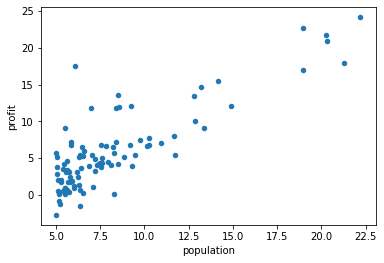

In [5]:
data.plot(x='population', y='profit', kind='scatter')

In [6]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [7]:
X = np.array(data['population'])
Y = np.array(data['profit'])

In [8]:
# scale
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
X = (X - means)/stds

In [9]:
n = np.shape(X)[0]
X = np.reshape(X, (n, 1))

In [10]:
ones = np.reshape(np.ones(n), (n, 1))

X = np.hstack((X, ones))

In [11]:
def mse(y, y_pred):
    return np.mean((y-y_pred)**2)

In [12]:
def linear_prediction(X, w):
    return np.dot(X, w)

In [13]:
def gradient_descent(X, y,  theta, learning_rate=-1e3, iterations=100):
    m = len(y)
    
    errors = []
    period = int(iterations / 10) 
    for i in range(iterations):
        y_pred = linear_prediction(X, theta)
        theta  = theta -(1/m) * learning_rate * (X.T.dot(y_pred - Y))
        error = mse(y, y_pred)
        
        if(i % period == 0 ):
            print('Iteration {} error: {}'.format( i, float(error) ))

        errors.append(error) 
    print('Final error %f' % error)
#     print('Finat theta: ', theta)
    plt.plot(errors, label='RMSE')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    return theta, errors
    

Iteration 0 error: 52.75929261539351
Iteration 500 error: 19.399350508832704
Iteration 1000 error: 7.133052425626058
Iteration 1500 error: 2.6227907415541285
Iteration 2000 error: 0.964388155801096
Iteration 2500 error: 0.354601112591373
Iteration 3000 error: 0.1303852067185415
Iteration 3500 error: 0.047942043968223956
Iteration 4000 error: 0.017628070221284473
Iteration 4500 error: 0.006481760767907694
Final error 0.002388


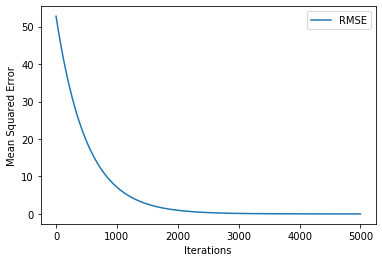

In [14]:
theta = np.random.randn(2, 1)
its = 5000
theta, errors = gradient_descent(X, Y, theta, iterations=its, learning_rate=1e-3)


### [5.2] Mini batch gradient descent с размером батча 32

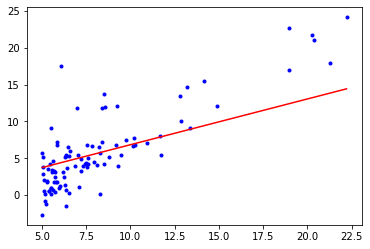

In [62]:
x = np.linspace(data['population'].min(), data['population'].max())
y_pred = x * theta[1][-1] + theta[1][-1]
plt.plot(data['population'], data['profit'], '.b')
plt.plot(x, y_pred, '-r')

## Gradient descent

In [76]:
X = np.array(data.values[:,0:1])
y = np.array(data.values[:,1])

In [77]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    return w + 2 * eta/X.shape[0] * X[train_ind] * (y[train_ind] - linear_prediction(X[train_ind], w))

In [78]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        w_new = stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(w-w_new)
        w = w_new
        errors.append(mse(y, linear_prediction(X, w)))
        iter_num += 1

        
    return w, errors


In [87]:
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]),max_iter=1e3)

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

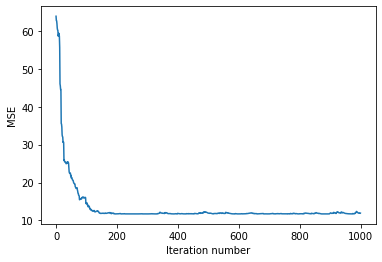

In [88]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')